In [175]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import h5py

In [258]:
r_data = np.load("../221005_testdata_FBI_Net_Grayscale_Samsung_SET1_MSE_Affine_layers_x17_filters_x64.npy",mmap_mode='r')
with h5py.File("../../data/test_Samsung_SNU_patches_SET1.hdf5", 'r') as f:
    clean_images = np.array(f['clean_images'])
    noisy_images = np.array(f['noisy_images'])
r_data.shape
mse_img = r_data[0]

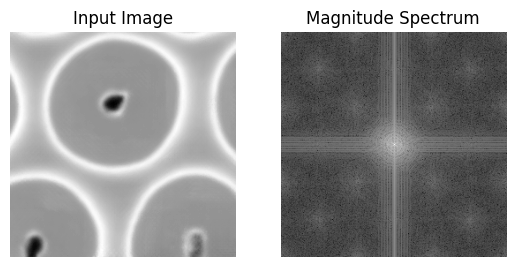

In [177]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121), plt.imshow(img,cmap='gray')
plt.title("Input Image"), plt.axis('off')
plt.subplot(122), plt.imshow(magnitude_spectrum,cmap='gray')
plt.title("Magnitude Spectrum"), plt.axis('off')
plt.show()

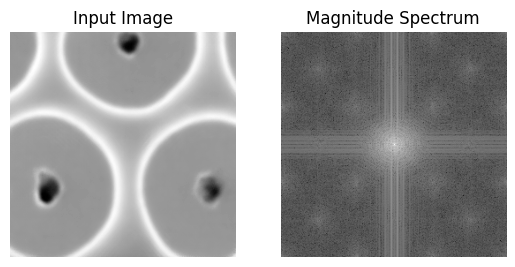

In [262]:
img = r_data[600]#mse_img
#img = noisy_images[600]
dft = cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

plt.subplot(121), plt.imshow(img,cmap='gray')
plt.title("Input Image"), plt.axis('off')
plt.subplot(122), plt.imshow(magnitude_spectrum,cmap='gray')
plt.title("Magnitude Spectrum"), plt.axis('off')
plt.show()


0.0 1.0
0.0 1.0


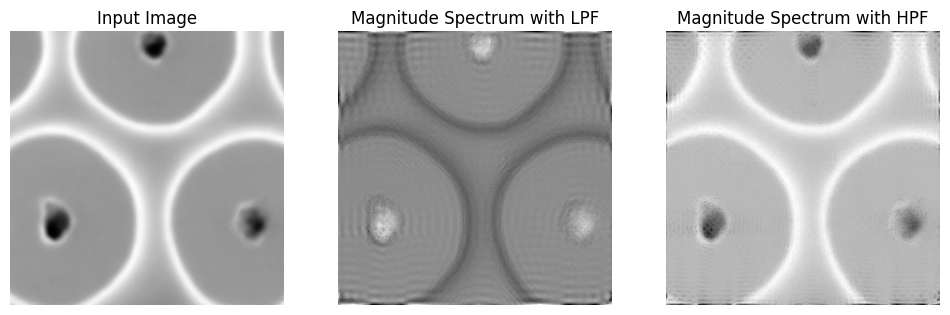

In [263]:
rows, cols = img.shape
crow,ccol = round(rows/2), round(cols/2)

# 마스크를 먼저 생성하고, 가운데 네모를 1로 나머지를 0으로 한다. LPF
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30,ccol-30:ccol+30] = 1

# 마스크와 역 DFT를 적용한다. 
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.figure(figsize=(12,8))
plt.subplot(131), plt.imshow(img,cmap='gray')
plt.title("Input Image"), plt.axis('off')

img_back1 = (img_back-img_back.min())/(img_back.max()-img_back.min())
print(img_back1.min(), img_back1.max())
plt.subplot(132), plt.imshow(img-img_back1,cmap='gray')
plt.title("Magnitude Spectrum with LPF"), plt.axis('off')


# HPF
mask = np.ones((rows,cols,2),np.uint8)
mask[crow-30:crow+30,ccol-30:ccol+30] = 0
# 마스크와 역 DFT를 적용한다. 
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

img_back2 = (img_back-img_back.min())/(img_back.max()-img_back.min())
print(img_back2.min(), img_back2.max())
plt.subplot(133), plt.imshow(img-img_back2,cmap='gray')
plt.title("Magnitude Spectrum with HPF"), plt.axis('off')
plt.show()

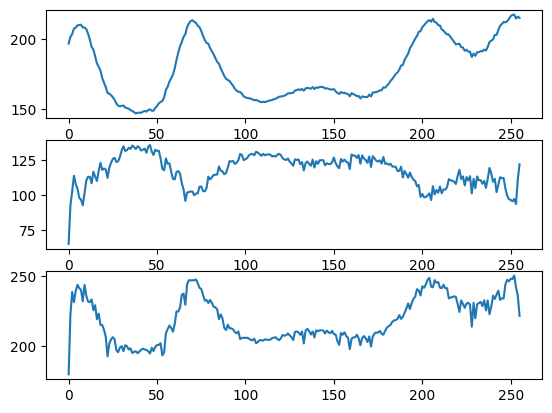

In [264]:
#img = noisy_images[0]
def scale0to1(img):
    img = (img-img.min())/(img.max()-img.min())
    return img
a = (img-img_back1)
a = scale0to1(a)
b = (img-img_back2)
b = scale0to1(b)
# a.min(), a.max()
index = 100

plt.subplot(311)
plt.plot(img[index]*255)
plt.subplot(312)
plt.plot(a[index]*255)
plt.subplot(313)
plt.plot(b[index]*255)

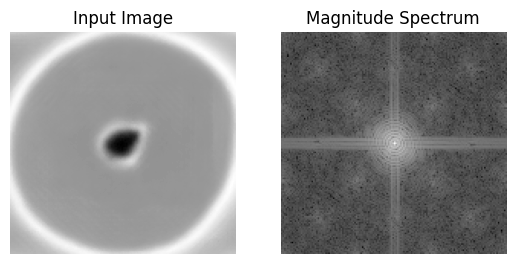

In [179]:
top = 8
bottom = 154
left = 44
right = 192
cropped_img = img[top:bottom,left:right]
f = np.fft.fft2(cropped_img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121), plt.imshow(cropped_img,cmap='gray')
plt.title("Input Image"), plt.axis('off')
plt.subplot(122), plt.imshow(magnitude_spectrum,cmap='gray')
plt.title("Magnitude Spectrum"), plt.axis('off')
plt.show()

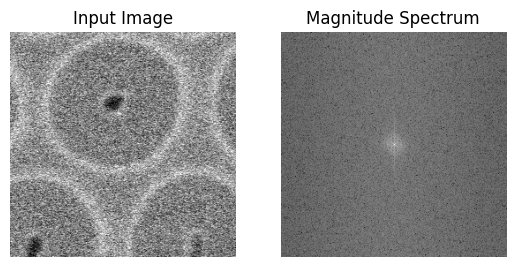

In [187]:
img = noisy_images[0]
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121), plt.imshow(img,cmap='gray')
plt.title("Input Image"), plt.axis('off')
plt.subplot(122), plt.imshow(magnitude_spectrum,cmap='gray')
plt.title("Magnitude Spectrum"), plt.axis('off')
plt.show()

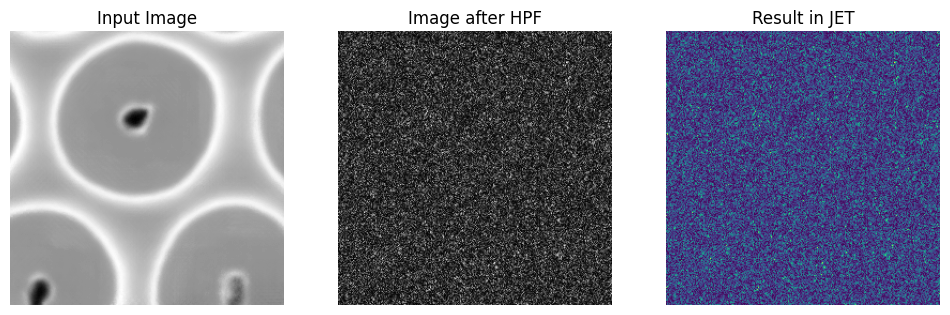

In [202]:
img = mse_img
rows,cols = img.shape
# 소수점으로 떨어지는 것을 방지하기 위함 : round
crow,ccol = round(rows/2), round(cols/2)

# 60x60 크기로 창 만들기
r = 60
fshift[crow-r:crow+r, ccol-r:ccol+r] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=(12,8))
plt.subplot(131),plt.imshow(img,cmap='gray')
plt.title("Input Image"), plt.axis('off')
plt.subplot(132),plt.imshow(img_back,cmap='gray')
plt.title("Image after HPF"), plt.axis('off')
plt.subplot(133),plt.imshow(img_back)
plt.title("Result in JET"), plt.axis('off')
plt.show()


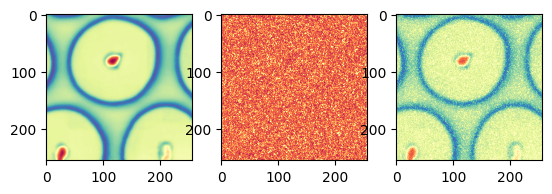

In [203]:
plt.subplot(131)
plt.imshow(img,cmap='Spectral')
plt.subplot(132)
plt.imshow(img_back,cmap='Spectral')
plt.subplot(133)
plt.imshow(img-img_back,cmap='Spectral')

In [197]:
img_back.min(), img_back.max()

(0.0002503992809521504, 0.4849141151960718)